In [4]:
import numpy as np
import PythonTools as PT
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from Accessories import ToolBox

%matplotlib inline
%load_ext autoreload
%autoreload 2
PT.plot_settings(font_family='Calibri')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Principal Component Analysis (PCA)

PCA is a linear transformation and its main goal is to decorrelate variables, based on finding the principal/major directions of variability. Based on this transformation, it is possible to implement dimension reduction and consider a number of principal components. PCA is widely used in statistics, data analysis/modeling and engineering problems. 

In this notebook, Python is used to to perform PCA followed by sphering an RPCA. sphering and Sphere-R are often used to to  decorrelate variables and minimize the deviation of decorrelate dimensions from the original variables. To get more on the theory and application of PCA, Sphere and sphering-R in geostatistics, read this article:

Barnett, R. M., Manchuk, J. G., & Deutsch, C. V. (2014). Projection pursuit multivariate transform. Mathematical Geosciences, 46(3), 337-359.

In [5]:
# Genrating correlated bivariate Noramlly ditributed random numbers
mu=[0.0, 0.0]
cov=[[1.0, 0.75], [0.75, 1.0]]
Y=np.random.multivariate_normal(mu,cov,10000)

In [6]:
# Calculating the covariance
C = 1/len(Y) * np.dot(Y.T,Y)
print(C)

[[ 0.99879452  0.73939694]
 [ 0.73939694  0.99150596]]


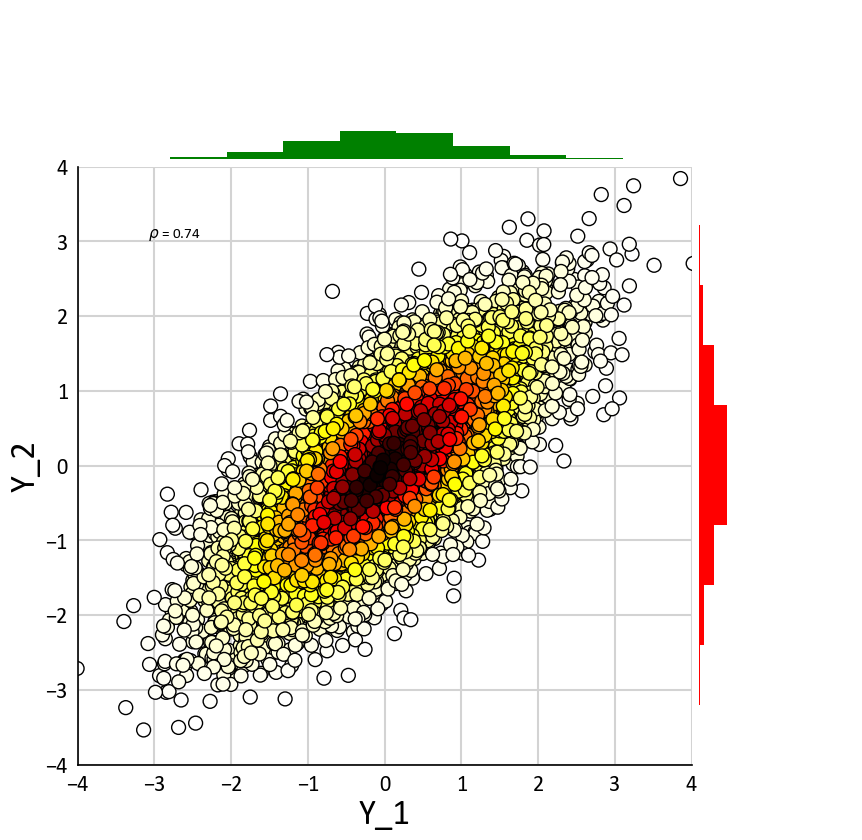

In [9]:
ToolBox.BV_Plot_Gridded(Y, xlabel='Y_1', ylabel='Y_2')

## Step 1) PCA

In this step, the principal directions/components of variability are identified

In [10]:
D, V = np.linalg.eig (C)
print(D)

[ 1.73455616  0.25574431]


In [11]:
X = np.dot(Y,V)
C_X = 1/len(X) * np.dot(X.T,X)
print(C_X)

[[  1.73455616e+00   1.89626093e-17]
 [  1.89626093e-17   2.55744311e-01]]


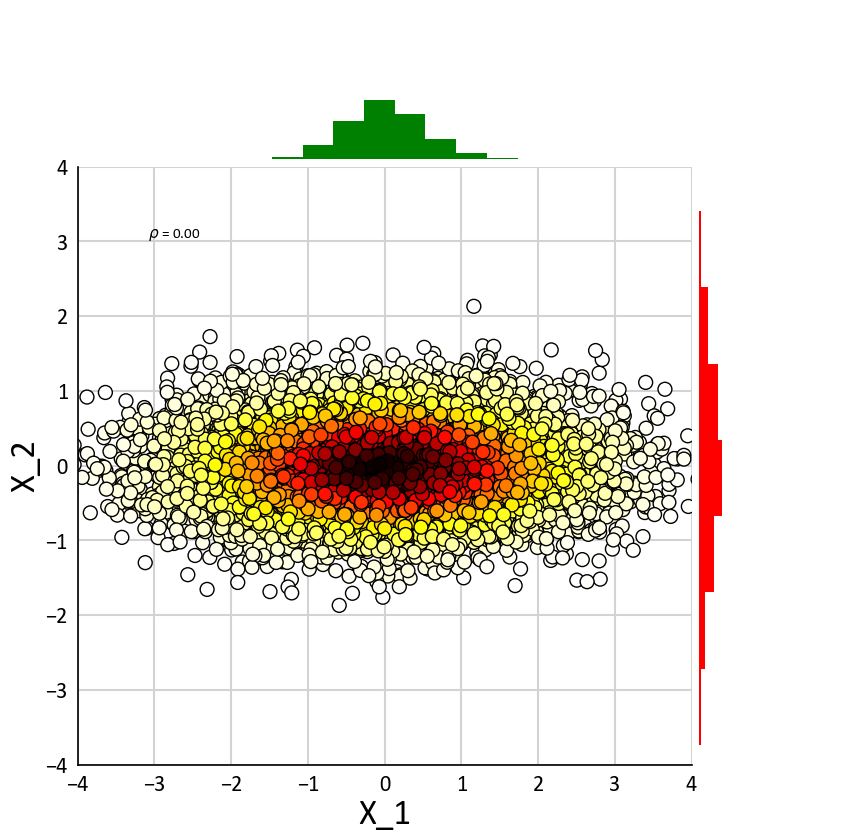

In [12]:
ToolBox.BV_Plot_Gridded(X, xlabel='X_1', ylabel='X_2')

## Step 2) Sphering

Sphering is the process of normalizing the principal components by the corresponding standard variation which is the squared root of the corresponding eigen value

In [13]:
S=[[D[0]**(-0.50), 0], [0, D[1]**(-0.50)]]
Z=np.dot(X,S)

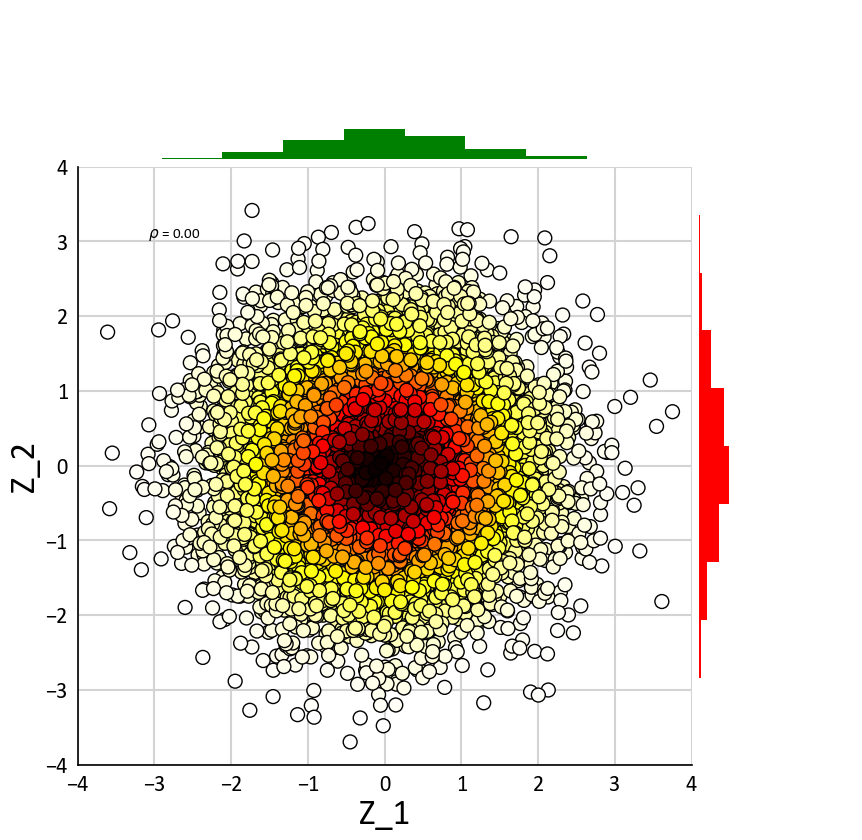

In [14]:
ToolBox.BV_Plot_Gridded(Z, xlabel='Z_1', ylabel='Z_2')

## Step 3) Sphere-R

Rotate back to minimize the minimizing between different variables

In [15]:
Q = np.dot(Z,V.T)

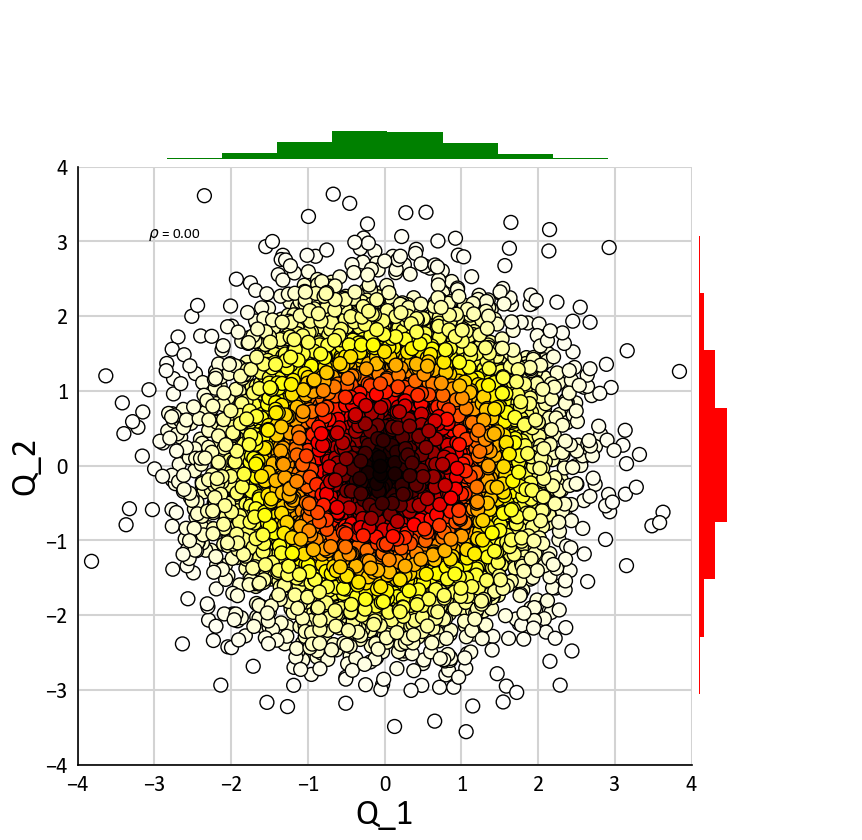

In [16]:
ToolBox.BV_Plot_Gridded(Q,  xlabel='Q_1', ylabel='Q_2')